# Assignment 2_2: Hopfield Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from hopfield import HopfieldNetwork

In [2]:
p0 = reshape_vector_to_image('p0.csv')
p1 = reshape_vector_to_image('p1.csv')
p2 = reshape_vector_to_image('p2.csv')

data = np.array([p0.reshape(-1), p1.reshape(-1), p2.reshape(-1)])

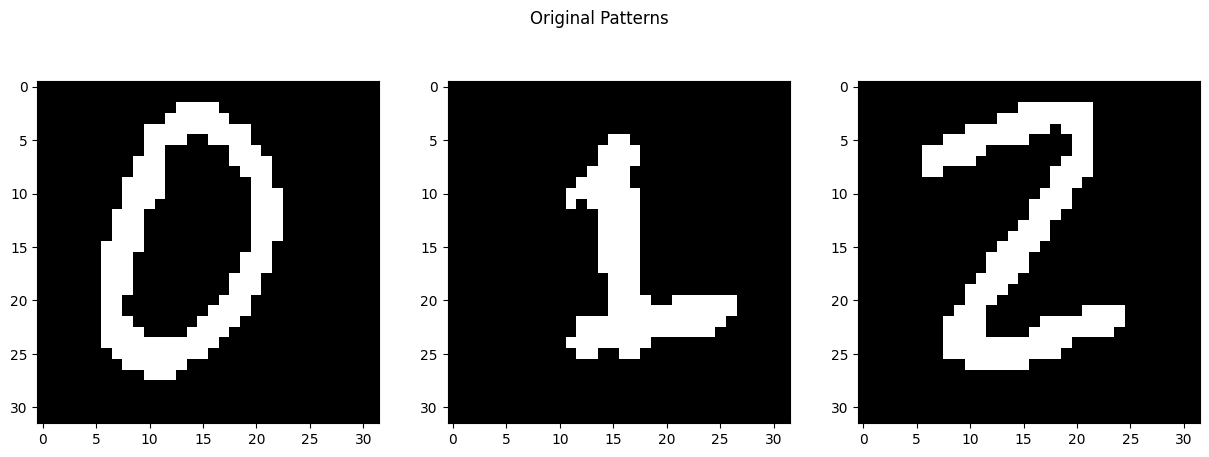

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Original Patterns')

axs[0].imshow(p0, cmap='gray')
axs[1].imshow(p1, cmap='gray')
axs[2].imshow(p2, cmap='gray')

## Digit: 0

In [4]:
# compute the 2 noisy images
p0_05 = distort_image(p0, 0.05)
p0_10 = distort_image(p0, 0.10)
p0_25 = distort_image(p0, 0.25)

In [5]:
net = HopfieldNetwork(data)
p0_05_retrieved, e05_history, o05_history = net(p0_05.reshape(-1), true_pattern=p0.reshape(-1), history=True)
p0_10_retrieved, e10_history, o10_history = net(p0_10.reshape(-1), true_pattern=p0.reshape(-1), history=True)
p0_25_retrieved, e25_history, o25_history = net(p0_25.reshape(-1), true_pattern=p0.reshape(-1), history=True)

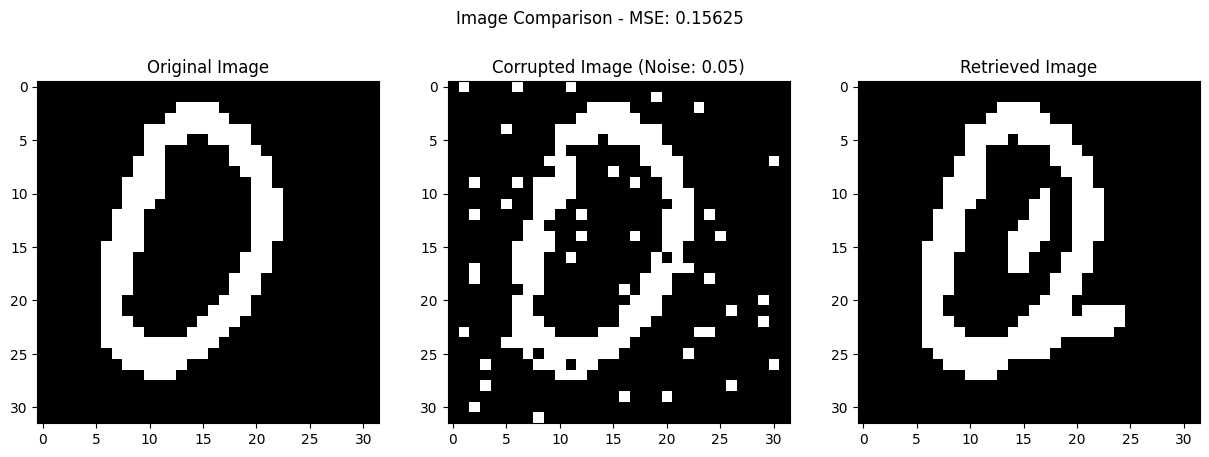

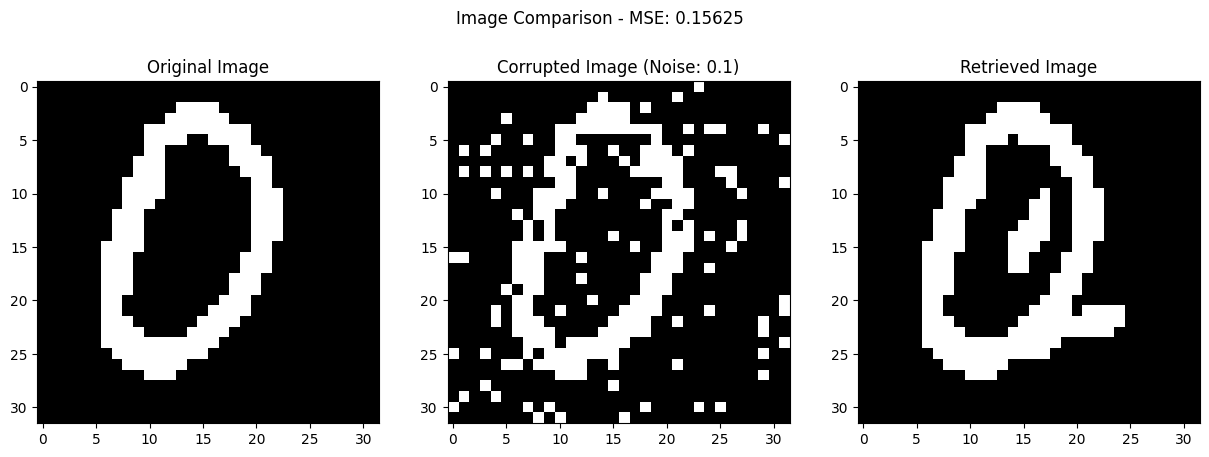

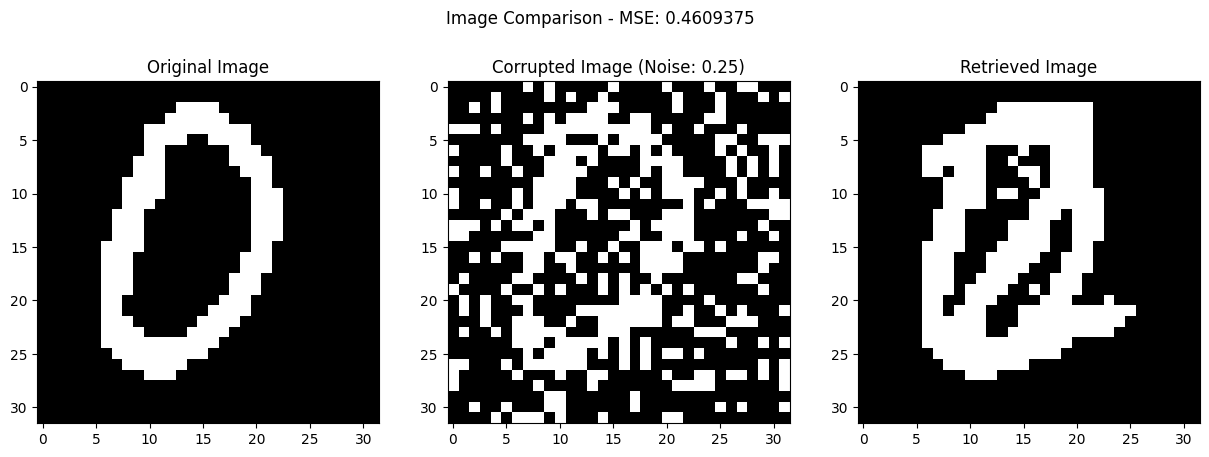

In [6]:
plot_images(p0, p0_05, p0_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p0, p0_10, p0_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p0, p0_25, p0_25_retrieved.reshape(p0.shape), noise=0.25)

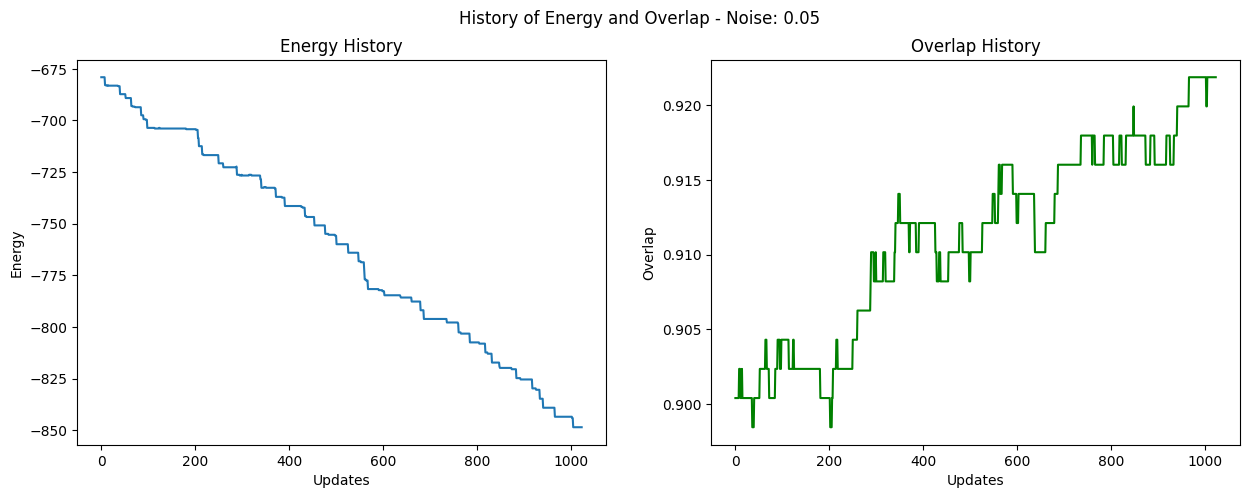

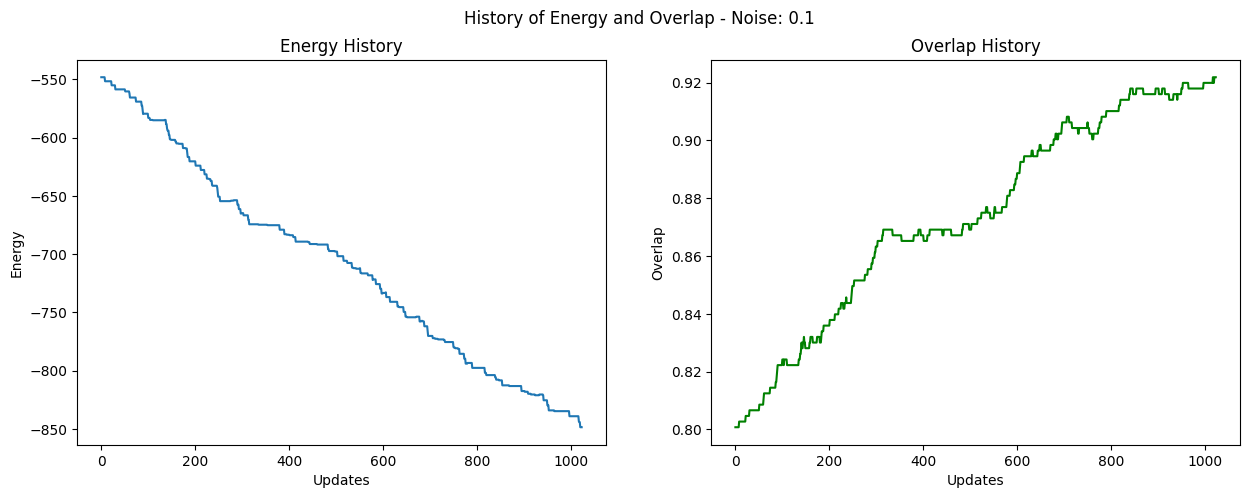

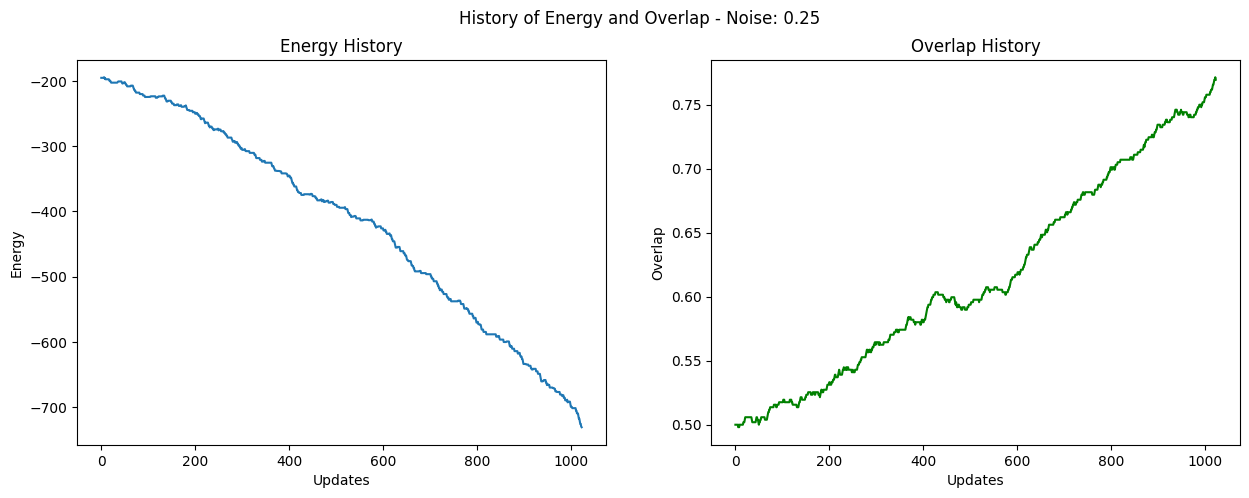

In [7]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

## Digit: 1

## Digit: 2